In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
rains = pd.read_csv('../data/weatherAUS.csv')
rains['Date'] = pd.to_datetime(rains['Date'])

In [4]:
rains.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [6]:
rains.shape

(145460, 23)

# Tratamiento para nulls: RainTomorrow 

Al ser la variable target, no hay mucho para hacer. Se procede a eliminarlas.

In [4]:
rains[rains['RainTomorrow'].isnull()]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
14,2008-12-15,Albury,8.4,24.6,0.0,NaN,NaN,NaN,NaN,S,...,57.0,32.0,1009.7,1008.7,NaN,NaN,15.9,23.5,No,NaN
283,2009-09-10,Albury,2.6,NaN,0.0,NaN,NaN,NaN,NaN,E,...,71.0,55.0,1017.8,1017.6,NaN,6.0,9.7,14.3,No,NaN
435,2010-02-09,Albury,22.1,35.1,0.0,NaN,NaN,NaN,NaN,ENE,...,58.0,37.0,1020.9,1017.8,NaN,1.0,26.9,33.5,No,NaN
437,2010-02-11,Albury,21.5,35.0,0.0,NaN,NaN,NaN,NaN,SSE,...,76.0,35.0,1015.8,1010.3,NaN,8.0,24.2,33.1,No,NaN
443,2010-02-17,Albury,15.5,30.6,0.0,NaN,NaN,NaN,NaN,SE,...,66.0,30.0,1015.9,1013.8,NaN,NaN,19.4,30.0,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144955,2016-02-07,Uluru,22.5,37.7,0.0,NaN,NaN,SE,50.0,SE,...,22.0,11.0,1012.6,1009.6,NaN,NaN,28.8,37.2,No,NaN
145091,2016-06-22,Uluru,12.3,19.1,0.0,NaN,NaN,NaN,NaN,NaN,...,79.0,62.0,1016.8,1014.1,8.0,8.0,15.6,18.9,No,NaN
145092,2016-06-23,Uluru,14.2,18.7,NaN,NaN,NaN,NaN,NaN,W,...,81.0,67.0,1015.2,1014.6,8.0,8.0,16.6,17.5,NaN,NaN
145335,2017-02-21,Uluru,13.5,NaN,0.0,NaN,NaN,NaN,NaN,ENE,...,23.0,11.0,1013.7,1008.4,NaN,NaN,25.2,34.4,No,NaN


In [9]:
rains.dropna(subset=['RainTomorrow'], inplace=True)
assert(len(rains[rains['RainTomorrow'].isnull()]) == 0)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
14,2008-12-15,Albury,8.4,24.6,0.0,NaN,NaN,NaN,NaN,S,...,57.0,32.0,1009.7,1008.7,NaN,NaN,15.9,23.5,No,NaN
283,2009-09-10,Albury,2.6,NaN,0.0,NaN,NaN,NaN,NaN,E,...,71.0,55.0,1017.8,1017.6,NaN,6.0,9.7,14.3,No,NaN
435,2010-02-09,Albury,22.1,35.1,0.0,NaN,NaN,NaN,NaN,ENE,...,58.0,37.0,1020.9,1017.8,NaN,1.0,26.9,33.5,No,NaN
437,2010-02-11,Albury,21.5,35.0,0.0,NaN,NaN,NaN,NaN,SSE,...,76.0,35.0,1015.8,1010.3,NaN,8.0,24.2,33.1,No,NaN
443,2010-02-17,Albury,15.5,30.6,0.0,NaN,NaN,NaN,NaN,SE,...,66.0,30.0,1015.9,1013.8,NaN,NaN,19.4,30.0,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144955,2016-02-07,Uluru,22.5,37.7,0.0,NaN,NaN,SE,50.0,SE,...,22.0,11.0,1012.6,1009.6,NaN,NaN,28.8,37.2,No,NaN
145091,2016-06-22,Uluru,12.3,19.1,0.0,NaN,NaN,NaN,NaN,NaN,...,79.0,62.0,1016.8,1014.1,8.0,8.0,15.6,18.9,No,NaN
145092,2016-06-23,Uluru,14.2,18.7,NaN,NaN,NaN,NaN,NaN,W,...,81.0,67.0,1015.2,1014.6,8.0,8.0,16.6,17.5,NaN,NaN
145335,2017-02-21,Uluru,13.5,NaN,0.0,NaN,NaN,NaN,NaN,ENE,...,23.0,11.0,1013.7,1008.4,NaN,NaN,25.2,34.4,No,NaN


# Tratamiento de nulls: Criterio global

Se eliminan las columnas que tengan mas de x nulls


In [6]:
nulls_by_row = rains.isnull().sum(axis=1)
nulls_by_row.describe()

count    142193.000000
mean          2.226263
std           2.459883
min           0.000000
25%           0.000000
50%           2.000000
75%           4.000000
max          20.000000
dtype: float64

<Axes: ylabel='Year'>

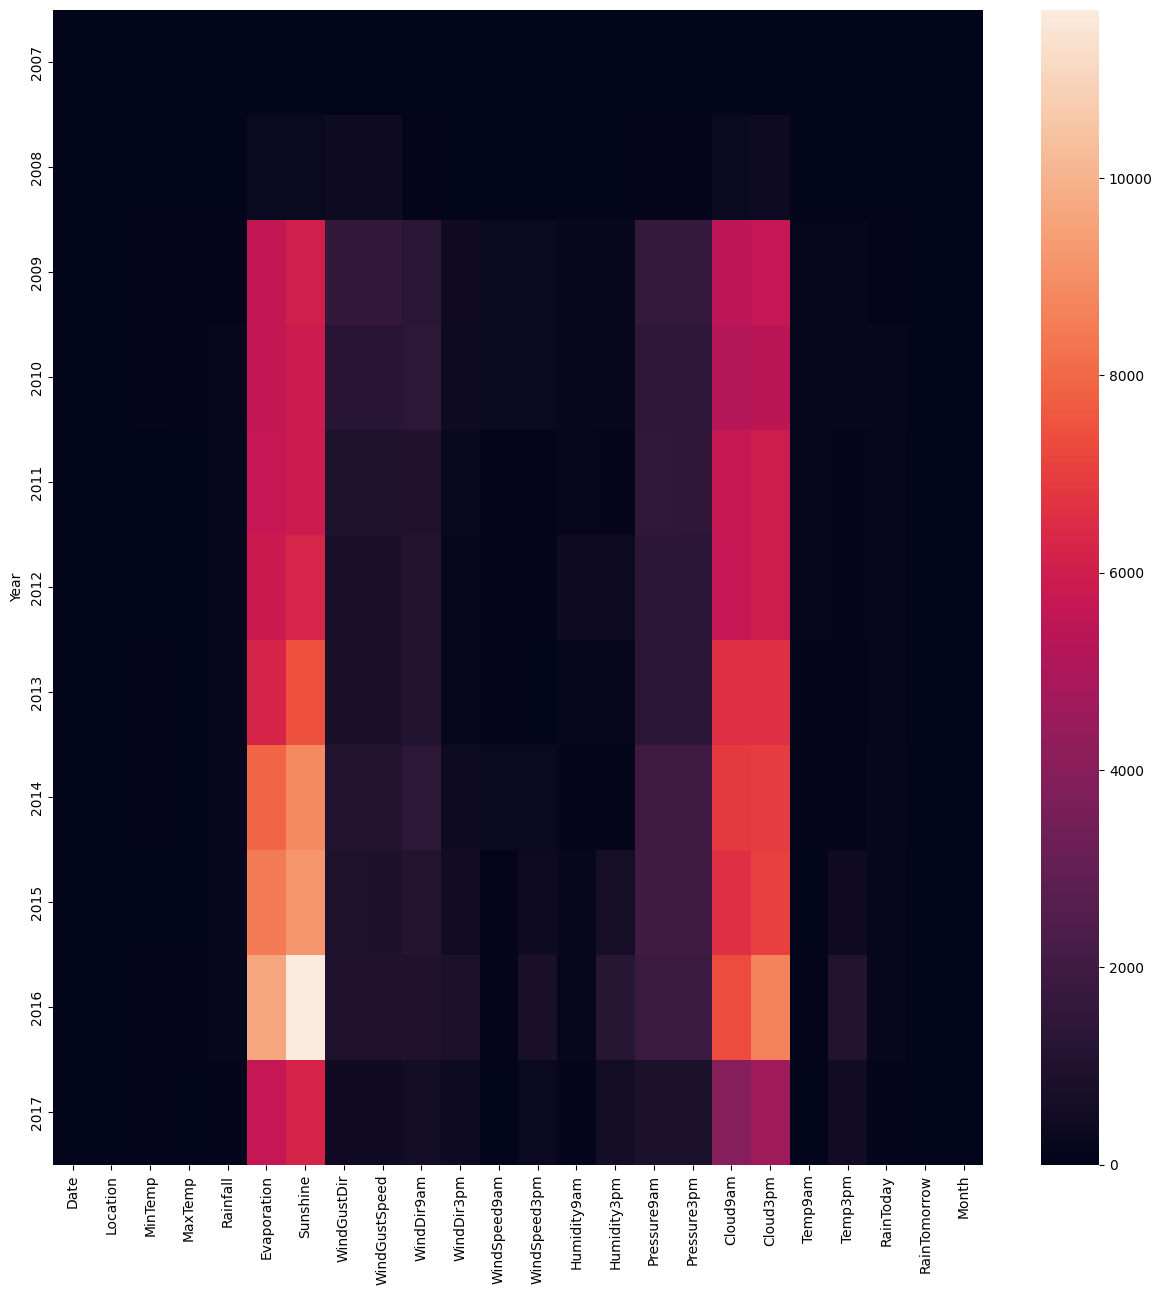

In [10]:
rains['Year'] = rains['Date'].dt.year
rains['Month'] = rains['Date'].dt.month
plt.figure(figsize=(15,15))
sns.heatmap(rains.groupby('Year').apply(lambda x: x.isnull().sum(), include_groups=False))

<Axes: ylabel='Month'>

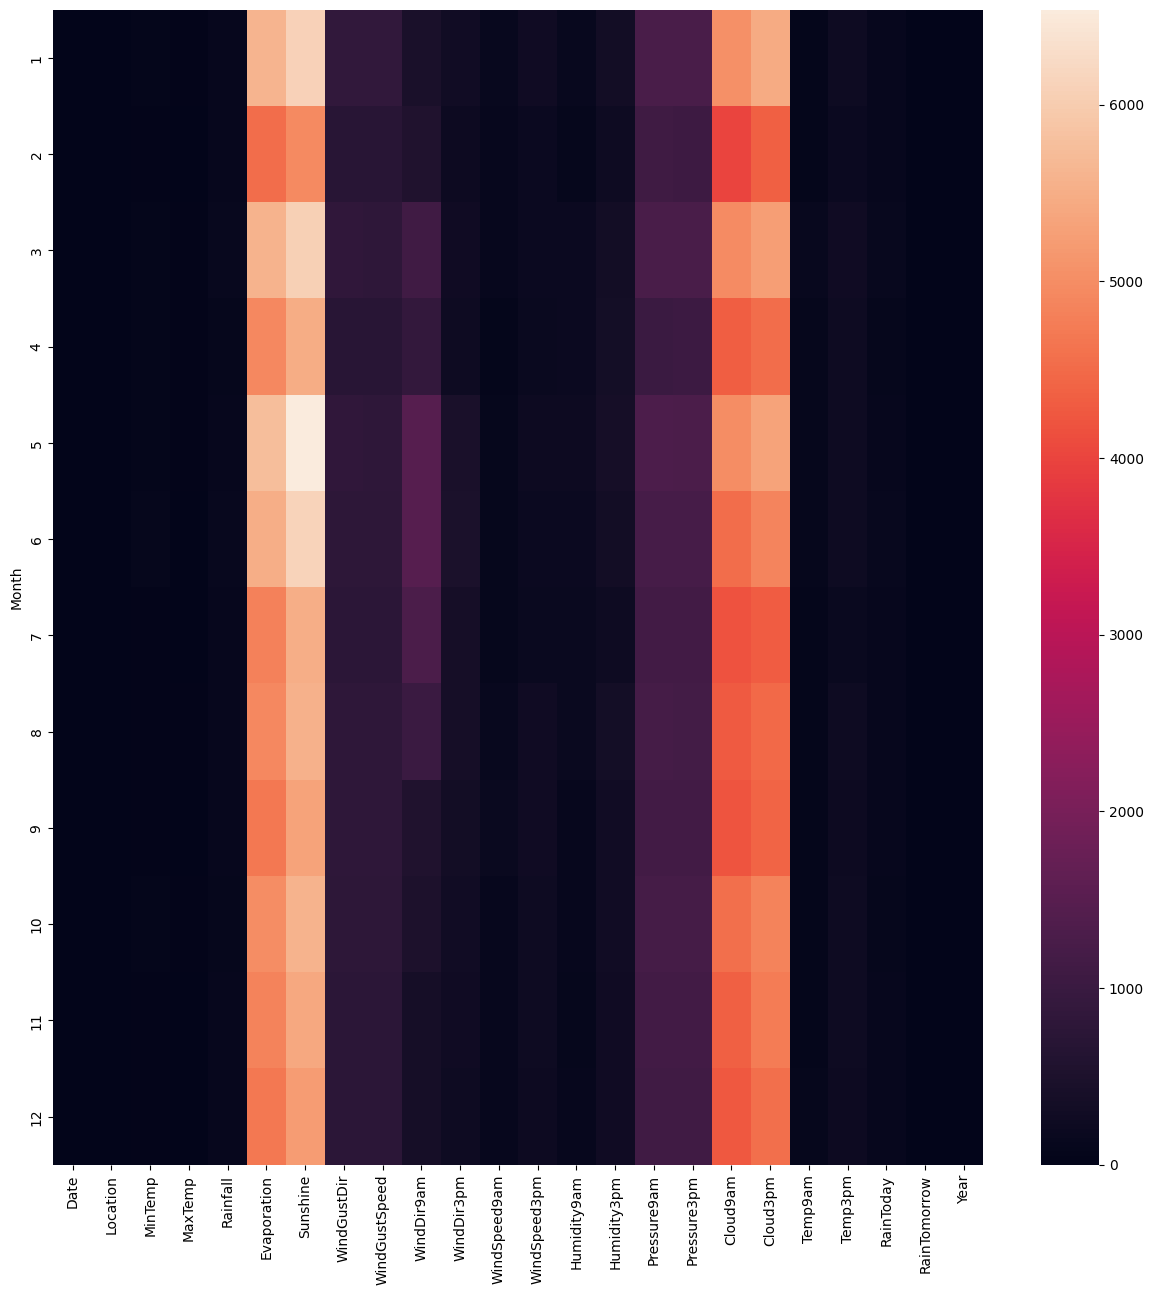

In [19]:
plt.figure(figsize=(15,15))
sns.heatmap(rains.groupby('Month').apply(lambda x: x.isnull().sum(), include_groups=False))

<Axes: ylabel='Location'>

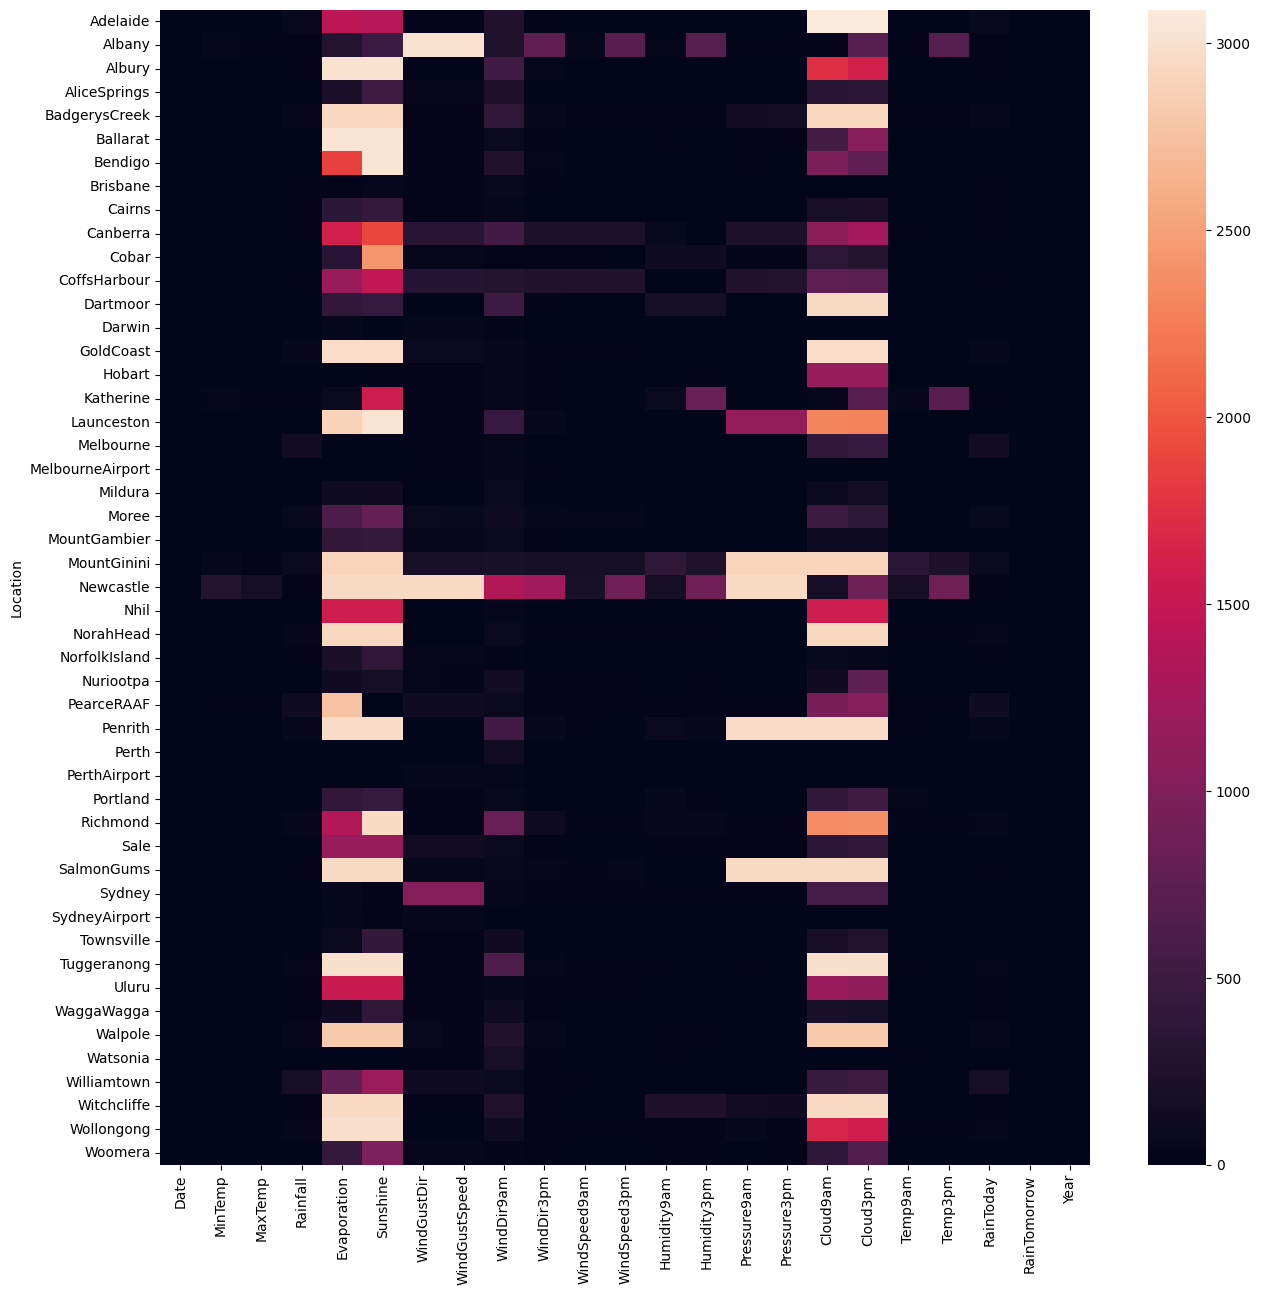

In [8]:
plt.figure(figsize=(15,15))
sns.heatmap(rains.groupby('Location').apply(lambda x: x.isnull().sum(), include_groups=False), annot=False)

ValueError: could not convert string to float: 'Albury'

In [78]:
mean_by_location_month = rains[["Location", "Month", "Evaporation", "Sunshine", "Cloud9am", "Cloud3pm"]].groupby(["Location", "Month"]).mean()
mean_by_location = rains[["Location", "Evaporation", "Sunshine", "Cloud9am", "Cloud3pm"]].groupby(["Location"]).mean()
global_mean = rains[["Evaporation", "Sunshine", "Cloud9am", "Cloud3pm"]].mean()



In [38]:
from sklearn.base import BaseEstimator, TransformerMixin
def row_imputer(
        row,
        grouped_2_levels,
        grouped_1_level,
        global_values,
        l1_group_key = "Location",
        l2_group_key = "Month"
):
    for c in ["Evaporation", "Sunshine", "Cloud3pm", "Cloud9am"]:
        imputation_value = grouped_2_levels.loc[(row[l1_group_key], row[l2_group_key])][c]
        if np.isnan(imputation_value):
            imputation_value = grouped_1_level.loc[row[l1_group_key]][c]
        if np.isnan(imputation_value):
            imputation_value = global_values[c]
        row[c] = imputation_value
    return row


class HierarchicalImputer(BaseEstimator, TransformerMixin):

    def __init__(self):
        self.global_mean = None
        self.mean_by_location = None
        self.mean_by_location_month = None

        self.global_top = None
        self.top_by_location = None
        self.top_by_location_month = None

    def fit(self, X):
        group_l1_l2 = lambda features: X[["Location", "Month"] + features].groupby(["Location", "Month"])
        group_l1 = lambda features: X[["Location"] + features].groupby(["Location"])

        mean_adjusted = ["Rainfall", "Evaporation", "Sunshine", "Cloud9am", "Cloud3pm", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Temp9am", "Temp3pm"]

        self.mean_by_location_month = group_l1_l2(mean_adjusted).mean()
        self.mean_by_location = group_l1(mean_adjusted).mean()
        self.global_mean = X[mean_adjusted].mean()



        # group_l1_l2 = lambda features: X[["Location", "Month"] + features].groupby(["Location", "Month"]).agg(lambda x: x.mode())
        # group_l1 = lambda features: X[["Location"] + features].groupby(["Location"]).agg(lambda x: x.mode())

        top_adjusted = ["WindGustDir", "WindDir9am", "WindDir3pm"]

        self.top_by_location_month = group_l1_l2(top_adjusted).agg(lambda x: x.mode())
        self.top_by_location = group_l1(top_adjusted).agg(lambda x: x.mode())
        self.global_top = X[top_adjusted].describe().agg(lambda x: x.mode())

    def transform(self, X):
        X_copy = X.copy()
        mean_imputer = lambda row: row_imputer(row, self.mean_by_location_month, self.mean_by_location, self.global_mean, l1_group_key = "Location", l2_group_key = "Month")
        return X_copy.apply(mean_imputer, axis=1)

imputer = HierarchicalImputer()
imputer.fit(rains)
imputer.transform(rains)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
0,2008-12-01,Albury,13.4,22.9,0.6,5.469824,7.624853,W,44.0,W,...,1007.7,1007.1,5.539683,4.901099,16.9,21.8,No,No,2008,12
1,2008-12-02,Albury,7.4,25.1,0.0,5.469824,7.624853,WNW,44.0,NNW,...,1010.6,1007.8,5.539683,4.901099,17.2,24.3,No,No,2008,12
2,2008-12-03,Albury,12.9,25.7,0.0,5.469824,7.624853,WSW,46.0,W,...,1007.6,1008.7,5.539683,4.901099,21.0,23.2,No,No,2008,12
3,2008-12-04,Albury,9.2,28.0,0.0,5.469824,7.624853,NE,24.0,SE,...,1017.6,1012.8,5.539683,4.901099,18.1,26.5,No,No,2008,12
4,2008-12-05,Albury,17.5,32.3,1.0,5.469824,7.624853,W,41.0,ENE,...,1010.8,1006.0,5.539683,4.901099,17.8,29.7,No,No,2008,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,5.469824,7.624853,E,31.0,ESE,...,1024.7,1021.2,5.440000,4.111111,9.4,20.9,No,No,2017,6
145455,2017-06-21,Uluru,2.8,23.4,0.0,5.469824,7.624853,E,31.0,SE,...,1024.6,1020.3,5.440000,4.111111,10.1,22.4,No,No,2017,6
145456,2017-06-22,Uluru,3.6,25.3,0.0,5.469824,7.624853,NNW,22.0,SE,...,1023.5,1019.1,5.440000,4.111111,10.9,24.5,No,No,2017,6
145457,2017-06-23,Uluru,5.4,26.9,0.0,5.469824,7.624853,N,37.0,SE,...,1021.0,1016.8,5.440000,4.111111,12.5,26.1,No,No,2017,6


/tmp/ipykernel_1680434/2609582826.py:50: UserWarning: Unable to sort modes: ufunc 'greater' did not contain a loop with signature matching types (<class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.StrDType'>) -> None
  self.global_top = X[top_adjusted].describe().agg(lambda x: x.mode())


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
0,2008-12-01,Albury,13.4,22.9,0.6,5.469824,7.624853,W,44.0,W,...,1007.7,1007.1,5.539683,4.901099,16.9,21.8,No,No,2008,12
1,2008-12-02,Albury,7.4,25.1,0.0,5.469824,7.624853,WNW,44.0,NNW,...,1010.6,1007.8,5.539683,4.901099,17.2,24.3,No,No,2008,12
2,2008-12-03,Albury,12.9,25.7,0.0,5.469824,7.624853,WSW,46.0,W,...,1007.6,1008.7,5.539683,4.901099,21.0,23.2,No,No,2008,12
3,2008-12-04,Albury,9.2,28.0,0.0,5.469824,7.624853,NE,24.0,SE,...,1017.6,1012.8,5.539683,4.901099,18.1,26.5,No,No,2008,12
4,2008-12-05,Albury,17.5,32.3,1.0,5.469824,7.624853,W,41.0,ENE,...,1010.8,1006.0,5.539683,4.901099,17.8,29.7,No,No,2008,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,5.469824,7.624853,E,31.0,ESE,...,1024.7,1021.2,5.440000,4.111111,9.4,20.9,No,No,2017,6
145455,2017-06-21,Uluru,2.8,23.4,0.0,5.469824,7.624853,E,31.0,SE,...,1024.6,1020.3,5.440000,4.111111,10.1,22.4,No,No,2017,6
145456,2017-06-22,Uluru,3.6,25.3,0.0,5.469824,7.624853,NNW,22.0,SE,...,1023.5,1019.1,5.440000,4.111111,10.9,24.5,No,No,2017,6
145457,2017-06-23,Uluru,5.4,26.9,0.0,5.469824,7.624853,N,37.0,SE,...,1021.0,1016.8,5.440000,4.111111,12.5,26.1,No,No,2017,6


In [31]:
rains[]

Location  Month
Adelaide  1        WSW
          2        WSW
          3        WSW
          4         SW
          5          N
                  ... 
Woomera   8          N
          9         SW
          10       SSW
          11       SSE
          12       SSW
Name: top, Length: 588, dtype: object

In [36]:
rains[["Location","Month","WindGustDir", "WindDir9am", "WindDir3pm"]].agg(lambda x: x.mode())

,Location,Month,WindGustDir,WindDir9am,WindDir3pm
0,Canberra,5,W,N,SE
